<a href="https://colab.research.google.com/github/Yesenia-AriasC/Curso-IA/blob/main/Semana2/S2Notebook2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import torch
import numpy as np
import pandas as pd
from torch.optim import optimizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Regresion lineal

In [ ]:
xd = np.array([[1], [2], [3], [4]])
yd = xd*2 + 3
reg = LinearRegression()
reg.fit(xd, yd)

LinearRegression()

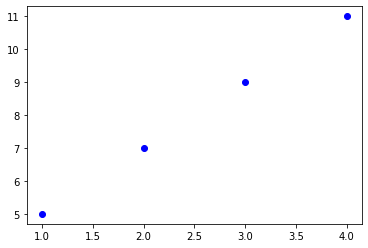

In [ ]:
plt.plot([i[0] for i in xd], [i[0] for i in yd], color="blue", marker="o", linestyle="None")
plt.show()

In [ ]:
x_new = [[5], [6], [7], [8]]
pr = reg.predict(np.array(x_new))
pr

array([[13.],
       [15.],
       [17.],
       [19.]])

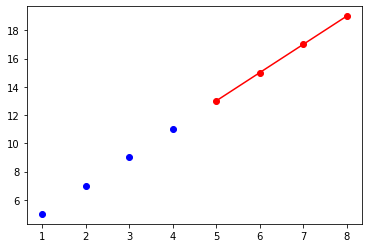

In [ ]:
plt.plot([i[0] for i in xd], [i[0] for i in yd], color="blue", marker="o", linestyle="None")
plt.plot([i[0] for i in x_new], [i[0] for i in pr], color="red", marker="o")
plt.show()

In [ ]:
# Mean-squared error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
print(mean_squared_error(y_true, y_pred))


0.375


# Red neuronal Básica


In [6]:
# Basic Neural Network meant to recieve 32x32 images (Built for MNIST dataset)
class Brain(torch.nn.Module): # torch.nn.Module is a base class for all neuronal networks in pytroch
    def __init__(self):
        super().__init__()

        self.c1 = torch.nn.Conv2d(1, 6, 5) # Initial convolution layer 1 input image channel, 6 output channels, 5x5 conv kernel
        self.c2 = torch.nn.Conv2d(6, 16, 5) # Second convolution layer 6 input channels, 16 output channels, 5x5 conv kernel

        # IMPORTANT: Linear layers are calculated as follows: 
        # y = xA^T + b
        # y is output tensor, x is input tensor, A is trnasoformation tensor of shape (out, 1) where each value represents a node, b is the added bias of shape (out, 1) where each value represents node specific bias

        self.l1 = torch.nn.Linear(16*5*5, 120) # Linear layer from 400->120
        self.l2 = torch.nn.Linear(120, 84) # Linear layer from 120->84
        self.l3 = torch.nn.Linear(84, 10) # Linear layer from 84->10

    def forward(self, x):
        print(f"1: {x.shape}")
        
        x = self.c1(x)
        print(f"2: {x.shape}") # new image has size (32-5+1)x(32-5+1) channels 6
        
        x = torch.nn.functional.max_pool2d(torch.nn.functional.relu(x), (2, 2))
        print(f"3: {x.shape}") # max pooling reduces space by half along x and y axis so new image is (28/2)x(28/2) channels 6

        x = self.c2(x)
        print(f"4: {x.shape}") # new image has size (14-5+1)x(14-5+1) channels 16

        x = torch.nn.functional.max_pool2d(torch.nn.functional.relu(x), (2, 2))
        print(f"5: {x.shape}") # max pooling reduces space by half along x and y axis so new image is (10/2)x(10/2) channels 16

        x = torch.flatten(x, 1)
        print(f"6: {x.shape}") # flattening along the second dimension (remember indexing starts at 0) provides every image flattened into tensor of 16*5*5

        x = torch.nn.functional.relu(self.l1(x))
        print(f"7: {x.shape}") # normal linear transformation layer from 400 -> 120

        x = torch.nn.functional.relu(self.l2(x))
        print(f"8: {x.shape}") # normal linear transformation layer from 120 -> 84

        x = self.l3(x)
        print(f"9: {x.shape}") # normal linear transformation layer from 84 -> 10

        return x


Este código define una clase llamada Brain que es una subclase de torch.nn.Module, que es la clase base para todas las redes neuronales en PyTorch. En el método __init__, se definen las capas de la red neuronal: dos capas de convolución (self.c1 y self.c2) y tres capas lineales (self.l1, self.l2 y self.l3). Cada capa de convolución y de línea tiene sus propios parámetros, que se ajustarán durante el entrenamiento de la red neuronal.

El método forward define cómo los datos se propagan a través de la red neuronal. Primero, se aplica la capa de convolución self.c1 a los datos de entrada x. Luego, se aplica una función de activación ReLU y una operación de "max pooling" (que reduce el tamaño de la imagen a la mitad en ambas dimensiones). A continuación, se aplica la capa de convolución self.c2, seguida de otra función de activación ReLU y una segunda operación de "max pooling". Luego, se aplana el tensor resultante y se pasa a través de las capas lineales self.l1, self.l2 y self.l3, con activaciones ReLU entre ellas. Finalmente, se devuelve el tensor resultante de la última capa lineal, que representa la salida de la red neuronal.

La decisión de la arquitectura de una red neuronal depende en gran medida del problema específico que se está abordando. En general, se busca diseñar una red que tenga suficiente capacidad para aprender la tarea que se le asigna, pero que no sea demasiado compleja para evitar el sobreajuste.

En el caso de la red neuronal presentada en el código, se ha diseñado para clasificar imágenes de dígitos escritos a mano utilizando la base de datos MNIST. La arquitectura de la red consta de dos capas convolucionales y tres capas completamente conectadas (o lineales). La primera capa convolucional tiene 6 filtros, mientras que la segunda tiene 16 filtros. Después de cada capa convolucional, se aplica una operación de max-pooling para reducir la dimensionalidad y capturar características más importantes.

Las capas lineales son relativamente más simples y tienen menos parámetros que las capas convolucionales. En este caso, se utilizan tres capas lineales con 120, 84 y 10 unidades, respectivamente. La capa de salida tiene 10 unidades ya que hay 10 posibles clases de dígitos en la base de datos MNIST.

La arquitectura específica de la red neuronal se ha diseñado a través de ensayo y error para encontrar una estructura que funcione bien para la tarea de clasificación de dígitos escritos a mano en MNIST.

In [ ]:
# Testing plz
inp = torch.randn(1, 1, 32, 32)
br = Brain()
out = br(inp)
print(out.shape)
print(out) # The torch.nn.Module automatically runs the forward function when passing in arguments directly to class instance


Este código realiza una prueba o testeo de la red neuronal Brain que se define previamente en el código. Primero, se crea un tensor de prueba inp utilizando la función torch.randn con dimensiones (1, 1, 32, 32) que representa una imagen de tamaño 32x32 con un solo canal (escala de grises) y una sola imagen.

Luego, se instancia la clase Brain en la variable br. La instancia de Brain se utiliza para pasar el tensor inp a través de la red neuronal mediante la llamada out = br(inp). La salida de la red neuronal se almacena en la variable out. Finalmente, se imprimen la forma (shape) de la salida y la salida en sí misma.

Es importante destacar que la llamada a la instancia de la clase Brain ejecuta automáticamente la función forward que se define en la clase, la cual aplica los pesos y sesgos de las capas de la red neuronal al tensor de entrada inp.




In [ ]:
# Make dummy data
dum = torch.Tensor([-1.2417,  0.3951,  0.8888, -1.7387, -1.9310,  1.0910,  1.1910, -0.3120, 0.5673,  0.6660])
dum = dum.view(1, -1)


In [ ]:
loss_func = torch.nn.MSELoss() # Declare a loss function with mean-squared error calc

In [ ]:
# Start training loop
optim = torch.optim.SGD(br.parameters(), lr=0.01)

for i in range(3):
    optim.zero_grad() # Gradients must be zeroed so they won't be added to each other
    out = br(inp) # Get the predicted output
    loss = loss_func(out, dum) # get the loss between predicted and target data
    loss.backward() # Calculate the backwards propagation gradients
    optim.step() # Backwards propagate

# POO básica para entender la red neuronal

La programación orientada a objetos es un paradigma de programación que se enfoca en la creación de objetos. 

Un **objeto** es una instancia de una clase, que se define como un conjunto de atributos y métodos. 

Los **atributos** son variables que almacenan información y los métodos son funciones que manipulan los atributos de un objeto o realizan alguna acción específica.

En el caso de la red neuronal, la clase se llama ```Brain```, y sus atributos y métodos se definen dentro de la clase. Los atributos son las capas de la red neuronal, y los métodos son las funciones ```__init__``` y ```forward```.

Aquí hay algunos ejemplos de cómo se define una clase y se crea un objeto en Python:



In [1]:
# Definición de una clase simple
class Persona:
    def __init__(self, nombre, edad):
        self.nombre = nombre
        self.edad = edad

    def presentarse(self):
        print("Hola, mi nombre es", self.nombre, "y tengo", self.edad, "años.")

# Creación de un objeto de la clase Persona
persona1 = Persona("Juan", 25)


En este ejemplo, ```Persona``` es la clase y ```nombre``` y ```edad``` son los atributos. El método ```__init__``` es el constructor de la clase, que se ejecuta automáticamente al crear un objeto de la clase. El método presentarse es un método que imprime información sobre la persona.

Para acceder a los atributos y métodos de un objeto, se utiliza la notación de punto. Por ejemplo:

In [2]:
# Acceder al atributo nombre del objeto persona1
print(persona1.nombre)

# Llamar al método presentarse del objeto persona1
persona1.presentarse()


Juan
Hola, mi nombre es Juan y tengo 25 años.


En el caso de la red neuronal, se crea un objeto de la clase ```Brain``` y se llama al método ```forward``` para hacer una predicción con la red neuronal.



In [7]:
# Crear un objeto de la clase Brain
br = Brain()

# Hacer una predicción con la red neuronal
inp = torch.randn(1, 1, 32, 32)
out = br(inp)
print(out.shape)


1: torch.Size([1, 1, 32, 32])
2: torch.Size([1, 6, 28, 28])
3: torch.Size([1, 6, 14, 14])
4: torch.Size([1, 16, 10, 10])
5: torch.Size([1, 16, 5, 5])
6: torch.Size([1, 400])
7: torch.Size([1, 120])
8: torch.Size([1, 84])
9: torch.Size([1, 10])
torch.Size([1, 10])


En este ejemplo, ```br``` es el objeto de la clase ```Brain```. El método ```forward``` es llamado pasando ```inp``` como argumento para hacer una predicción con la red neuronal. La variable ```out``` almacena el resultado de la predicción y se imprime su forma.


La línea print(out.shape) imprime la forma o tamaño de la salida de la red neuronal, que es un tensor. En el caso de este código, como se ha utilizado un tensor de entrada de tamaño (1, 1, 32, 32), la forma de la salida será (1, 10), lo que indica que la salida es un tensor con una dimensión de tamaño 1 y otra dimensión de tamaño 10. Esto significa que la red neuronal ha producido una clasificación de probabilidad para cada una de las 10 posibles clases de dígitos (0 a 9).

---

## Primeras dos capas


In [ ]:
self.c1 = torch.nn.Conv2d(1, 6, 5) # Initial convolution layer 1 input image channel, 6 output channels, 5x5 conv kernel
self.c2 = torch.nn.Conv2d(6, 16, 5) # Second convolution layer 6 input channels, 16 output channels, 5x5 conv kernel

En la red neuronal convolucional definida, se utilizan dos capas convolucionales: ```self.c1``` y ```self.c2```.

```self.c1``` utiliza una convolución con un kernel de tamaño 5x5, un solo canal de entrada (ya que las imágenes de entrada son en escala de grises), y produce 6 canales de salida. En otras palabras, cada imagen de entrada se convoluciona con 6 filtros de tamaño 5x5 para producir 6 mapas de características.

```self.c2``` utiliza una convolución con un kernel de tamaño 5x5, 6 canales de entrada (ya que cada una de las 6 características producidas por self.c1 se utiliza como entrada), y produce 16 canales de salida. En otras palabras, cada uno de los 6 mapas de características producidos por self.c1 se convoluciona con 16 filtros de tamaño 5x5 para producir 16 nuevos mapas de características.

En resumen, self.c1 y self.c2 se utilizan para extraer características de las imágenes de entrada mediante la convolución con filtros específicos. Cada capa produce múltiples canales de salida, que se utilizan como entrada para la siguiente capa.

# Capas 3, 4 y 5

In [ ]:
self.l1 = torch.nn.Linear(16*5*5, 120) # Linear layer from 400->120
self.l2 = torch.nn.Linear(120, 84) # Linear layer from 120->84
self.l3 = torch.nn.Linear(84, 10) # Linear layer from 84->10

Estas líneas de código definen capas de tipo "linear" (también conocidas como "fully connected layers") que transforman la entrada recibida en una nueva salida.

La primera línea define una capa lineal que toma como entrada un tensor de tamaño 16x5x5 (es decir, 16 canales de imagen con tamaño 5x5) y lo transforma en una salida de tamaño 120. La entrada 16x5x5 viene de la última capa de convolución, que produce 16 canales de imagen de tamaño 5x5.

La segunda línea define otra capa lineal que toma una entrada de tamaño 120 y la transforma en una salida de tamaño 84.

La tercera línea define una capa lineal final que toma una entrada de tamaño 84 y la transforma en una salida de tamaño 10, que representa la cantidad de posibles dígitos que el modelo puede reconocer (del 0 al 9).

## maxpooling y relu / funcion de activacion

In [ ]:
torch.nn.functional.max_pool2d(torch.nn.functional.relu(x), (2, 2))

Se hace maxpooling y función de activación al mismo tiempo en la red neuronal convolucional para ayudar a reducir el tamaño de la imagen y extraer las características más importantes de la misma. 

La función de activación, en este caso ReLU, se aplica primero para activar los píxeles positivos y establecer los negativos a cero. Luego, el maxpooling se aplica para reducir el tamaño de la imagen, tomando el valor máximo de una región de píxeles en lugar de todos los píxeles en la región. Esto ayuda a reducir el tamaño de la imagen y extraer las características más importantes de la misma. Al hacerlo juntos, se puede mejorar la eficiencia computacional y la precisión de la red neuronal convolucional.